In [1]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

In [58]:

import requests 
from bs4 import BeautifulSoup

#request 라이브러리 이용 가져오기
htmls = requests.get("https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1")

#BeautifulSoup 이용 파싱하기
bs = BeautifulSoup(htmls.content, 'html.parser')

titles = bs.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')

print(title)

<div class="Yfwt5">비트코인 $28K 돌파--부채 협상 타결, 유동성 유입 기대</div>


In [1]:
# Chrome WebDriver 실행 경로 지정
webdriver_path = '/path/to/chromedriver'

# Chrome WebDriver 인스턴스 생성
driver = webdriver.Chrome(webdriver_path)

# Google 뉴스 검색 결과 페이지 접속
driver.get('https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1')

# Selenium으로 가져온 HTML을 BeautifulSoup로 파싱
bs = BeautifulSoup(driver.page_source, 'html.parser')

# 뉴스 제목 요소 찾기
titles = bs.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')

data = {'Title': titles}
df = pd.DataFrame(data)

print("전체 개수:", len(df))

#WebDriver 종료
#driver.quit()


NameError: name 'webdriver' is not defined

In [88]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1"

url.format("")

driver.get(url)

In [90]:
titles = driver.find_elements(By.CLASS_NAME, 'mCBkyc')
for title in titles:
    print(title.text)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=113.0.5672.127)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00468893+48451]
	(No symbol) [0x003FB8A1]
	(No symbol) [0x00305058]
	(No symbol) [0x002ED073]
	(No symbol) [0x0034DEBB]
	(No symbol) [0x0035BFD3]
	(No symbol) [0x0034A0B6]
	(No symbol) [0x00327E08]
	(No symbol) [0x00328F2D]
	GetHandleVerifier [0x006C8E3A+2540266]
	GetHandleVerifier [0x00708959+2801161]
	GetHandleVerifier [0x0070295C+2776588]
	GetHandleVerifier [0x004F2280+612144]
	(No symbol) [0x00404F6C]
	(No symbol) [0x004011D8]
	(No symbol) [0x004012BB]
	(No symbol) [0x003F4857]
	BaseThreadInitThunk [0x775C6359+25]
	RtlGetAppContainerNamedObjectPath [0x77A67C24+228]
	RtlGetAppContainerNamedObjectPath [0x77A67BF4+180]


In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import random

title_list = []
content_list = []
date_list = []

for i in range(0, 20, 10):
    driver = webdriver.Chrome()
    # Google 뉴스 검색 결과 페이지 접속
    url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1"
    driver.get(url)
    time.sleep(3)

    titles = driver.find_elements(By.CLASS_NAME, 'mCBkyc')
    for title in titles:
        title_list.append(title.text)

    contents = driver.find_elements(By.CLASS_NAME, 'GI74Re')
    for content in contents:
        content_list.append(content.text)

    dates = driver.find_elements(By.CLASS_NAME, 'WG9SHc')
    for date in dates:
        date_list.append(date.get_attribute('innerText'))

    driver.quit()

num = len(title_list)

with open("google_news_test.csv", "a", encoding="UTF-8") as csv_file:
    for i in range(num):
        csv_file.write("{}, {}, {}\n".format(title_list[i], content_list[i], date_list[i]))

print("데이터 저장이 완료되었습니다.")


데이터 저장이 완료되었습니다.


In [27]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
import random

word = input("검색하고자 하는 단어를 입력해주세요!")
url = 'https://www.google.com/search?q={}&newwindow=1&tbm=nws&ei=TUmuY5LlINeghwOfw7egDQ&start={}&sa=N&ved=2ahUKEwjSv42woqD8AhVX0GEKHZ_hDdQQ8tMDegQIBBAE&biw=763&bih=819&dpr=2.2'

page = 1

title_list = []
content_list = []
link_list = []

timesleep = random.randint(1, 10)

# 웹 드라이버 초기화
service = Service('chromedriver 경로')  # 적절한 드라이버 경로로 변경해야 합니다
driver = webdriver.Chrome(service=service)

for i in range(0, 20, 10):
    new_url = url.format(word, i)
    driver.get(new_url)
    time.sleep(3)

    print("*" * 10 + str(page) + "*" * 10)
    page = page + 1

    titles = driver.find_elements(By.CLASS_NAME, 'mCBkyc')

    for title in titles:
        title_list.append(title.text.replace(",", ""))

    contents = driver.find_elements(By.CLASS_NAME, 'GI74Re')

    for content in contents:
        content_list.append(content.text.replace(",", ""))

    links = driver.find_elements(By.CLASS_NAME, 'WlydOe')

    for link in links:
        link_list.append(link.get_attribute('href'))

num = len(title_list)
for i in range(num):
   csv = open("google_news_test.csv", "a", encoding="UTF-8")
   csv.write("{}, {}, {}\n".format(title_list[i], content_list[i], link_list[i]))
   csv.close()    
    
driver.quit()  # 웹 드라이버 종료

# 크롤링 결과 처리 및 저장 코드 작성
# 이후 title_list, content_list, link_list 등을 활용하여 원하는 작업을 수행할 수 있습니다.


검색하고자 하는 단어를 입력해주세요! 비트코인


**********1**********
**********2**********


In [16]:
import requests
from bs4 import BeautifulSoup
import csv

html = requests.get("https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sxsrf=APwXEdfE8CSepAPmkwnj1OFFoGtHW2B-KA:1685333010854&source=lnms&tbm=nws&sa=X&ved=2ahUKEwidq8Lb0pn_AhV-m1YBHeJBDkoQ_AUoAnoECAEQBA&biw=815&bih=835&dpr=1.1")
bs = BeautifulSoup(html.content, 'html.parser')

titles = bs.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')
contents = bs.find_all('div', class_='Y3v8qd')

In [9]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&hl=en&sxsrf=APwXEde5Bu-nwFXtG5lg4jJoKEzISP7Fvw:1685406582683&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiRvqbl5Jv_AhUGEogKHfDgB58Q_AUoAnoECAEQBA&biw=1497&bih=1377&dpr=0.67"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

titles = soup.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')
contents = soup.find_all('div', class_='GI74Re nDgy9d')

with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용'])
    for title, content in zip(titles, contents):
        news_title = title.find('div', class_='n0jPhd ynAwRc MBeuO nDgy9d').text.strip()
        news_content = content.find('div', class_='GI74Re nDgy9d').text.strip()
        writer.writerow([news_title, news_content])

print("뉴스 제목과 내용이 성공적으로 저장되었습니다.")


뉴스 제목과 내용이 성공적으로 저장되었습니다.


In [4]:
import requests
import csv

API_KEY = 'YOUR_API_KEY'
SEARCH_QUERY = 'bitcoin'
CSV_FILE_PATH = 'news.csv'

def get_news_data():
    url = f'https://news.googleapis.com/news/v3/search?q={SEARCH_QUERY}&key={API_KEY}'
    response = requests.get(url)
    data = response.json()
    return data.get('articles', [])

def save_data_to_csv(articles):
    with open(CSV_FILE_PATH, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['뉴스 제목', '뉴스 내용'])
        for article in articles:
            news_title = article['title']
            news_content = article['description']
            writer.writerow([news_title, news_content])

# 뉴스 데이터 가져오기
news_articles = get_news_data()

# CSV 파일에 저장
save_data_to_csv(news_articles)

print("뉴스 데이터가 성공적으로 저장되었습니다.")


[] []


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://search.naver.com/search.naver?query=비트코인&where=news"
start = 1  # 시작 페이지 번호
articles = []

while True:
    page_url = f"{url}&start={start}"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    news_area = soup.find_all('div', class_='news_area')
    
    if not news_area:  # news_area가 비어있으면 마지막 페이지라고 가정
        break
    
    articles.extend(news_area)
    start += 10  # 다음 페이지로 이동
    
with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용', '뉴스 날짜'])
    for article in articles:
        news_title_elem = article.find('a', class_='news_tit')
        news_title = news_title_elem.text.strip() if news_title_elem else ""
        
        news_content_elem = article.find('a', class_='api_txt_lines dsc_txt_wrap')
        news_content = news_content_elem.text.strip() if news_content_elem else ""
        
        news_date_elem = article.find('span', class_='info')
        news_date = news_date_elem.text.strip() if news_date_elem else ""
        
        writer.writerow([news_title, news_content, news_date])

print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")


In [45]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://search.naver.com/search.naver?query=비트코인&where=news"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('div', class_='news_area')

with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용'])
    for article in articles:
        news_title = article.find('a', class_='news_tit').text.strip()
        news_content = article.find('div', class_='news_dsc').text.strip()
        news_date_elem = article.find('span', class_='info').test.strip()
        writer.writerow([news_title, news_content])

print("뉴스 제목과 내용이 성공적으로 저장되었습니다.")


AttributeError: 'NoneType' object has no attribute 'strip'

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://search.naver.com/search.naver?query=비트코인&where=news"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('div', class_='news_area')

with open('news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용', '뉴스 날짜'])
    for article in articles:
        news_title_elem = article.find('a', class_='news_tit')
        news_title = news_title_elem.text.strip() if news_title_elem else ""
        
        news_content_elem = article.find('a', class_='api_txt_lines dsc_txt_wrap')
        news_content = news_content_elem.text.strip() if news_content_elem else ""
        
        news_date_elem = article.find('span', class_='info')
        news_date = news_date_elem.text.strip() if news_date_elem else ""
        
        writer.writerow([news_title, news_content, news_date])

print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import signal

url = "https://search.naver.com/search.naver?query=비트코인&where=news"
articles = []

def start_one():
    start = 1  # 시작 페이지 번호
    while True:
        page_url = f"{url}&start={start}"
        response = requests.get(page_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        news_area = soup.find_all('div', class_='news_area')

        if not news_area:  # news_area가 비어있으면 마지막 페이지라고 가정
            break

        articles.extend(news_area)
        start += 10  # 다음 페이지로 이동

        # 사용자 입력 감지
        if signal.getsignal(signal.SIGINT) is not signal.default_int_handler:
            print("사용자에 의해 프로그램이 중단되었습니다.")
            break
    
    if articles:
        with open('./data/news.csv', 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['뉴스 제목', '뉴스 내용', '뉴스 날짜'])
            for article in articles:
                news_title_elem = article.find('a', class_='news_tit')
                news_title = news_title_elem.text.strip() if news_title_elem else ""

                news_content_elem = article.find('a', class_='api_txt_lines dsc_txt_wrap')
                news_content = news_content_elem.text.strip() if news_content_elem else ""

                news_date_elem = article.find('span', class_='info')
                news_date = news_date_elem.text.strip() if news_date_elem else ""

                writer.writerow([news_title, news_content, news_date])

        print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")
    else:
        print("수집된 뉴스가 없습니다.")

# KeyboardInterrupt 시그널 핸들러 등록
signal.signal(signal.SIGINT, signal.default_int_handler)

start_one()

In [11]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.google.com/search?q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&hl=en&sxsrf=APwXEde5Bu-nwFXtG5lg4jJoKEzISP7Fvw:1685406582683&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiRvqbl5Jv_AhUGEogKHfDgB58Q_AUoAnoECAEQBA&biw=1497&bih=1377&dpr=0.67"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

titles = soup.find_all('div', class_='n0jPhd ynAwRc MBeuO nDgy9d')
contents = soup.find_all('div', class_='GI74Re nDgy9d')
dates = soup.find_all('div', class_='WG9SHc')

with open('news.csv', 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['뉴스 제목', '뉴스 내용', '날짜'])
    for title, content, date in zip(titles, contents, dates):
        news_title = title.text.strip()
        news_content = content.text.strip()
        news_date = date.text.strip()
        writer.writerow([news_title, news_content, news_date])

print("뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.")


뉴스 제목, 내용, 날짜가 성공적으로 저장되었습니다.


In [10]:
import pyupbit
import pandas as pd
from datetime import date, datetime
import time

btc_krw = 'KRW-BTC'
btc_krw_df = pd.DataFrame()  # Initialize with an empty DataFrame
count = 200000000

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2017, 9, 25)

while True:
    data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is None:
        break
    if btc_krw_df.empty:
        btc_krw_df = data
    else:
        btc_krw_df = pd.concat([btc_krw_df, data])
    last_timestamp = data.index[-1]
    count += len(data)
    if len(data) < count:
        break
    time.sleep(1)

print(btc_krw_df.shape)
print(btc_krw_df)


KeyboardInterrupt: 

In [11]:
import pyupbit
import pandas as pd
from datetime import date, datetime
import time

# API 요청 속도 제한
REQUESTS_PER_SECOND = 10

btc_krw = 'KRW-BTC'
btc_krw_df = pd.DataFrame()  # Initialize with an empty DataFrame
count = 2000000

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2017, 9, 25)

# API 요청 속도 제한을 고려하여 데이터 가져오기
request_count = 0  # API 요청 횟수 초기화
start_time = time.time()  # 시작 시간 기록

while True:
    # 요청 횟수가 제한에 도달한 경우, 일정 시간만큼 대기
    if request_count >= REQUESTS_PER_SECOND:
        elapsed_time = time.time() - start_time
        if elapsed_time < 1:
            time.sleep(1 - elapsed_time)
        request_count = 0  # 요청 횟수 초기화
        start_time = time.time()  # 시작 시간 갱신

    data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is None:
        break
    if btc_krw_df.empty:
        btc_krw_df = data
    else:
        btc_krw_df = pd.concat([btc_krw_df, data])
        last_timestamp = data.index[-1]
        count += 200
    if len(data) < count:
        break
    
    request_count += 1  # API 요청 횟수 증가

print(btc_krw_df.shape)
print(btc_krw_df)


KeyboardInterrupt: 

In [ ]:
import pyupbit
import pandas as pd
from datetime import date, datetime
import time

btc_krw = 'KRW-BTC'
btc_krw_df = pd.DataFrame() # Initialize with an empty DataFrame
batch_size = 10000 # Number of data to fetch in each API request
total_count = 2000000 # Total number of data to fetch
date_today = date.today().strftime("%Y-%m-%d")
date_start = datetime(2017, 9, 25)

num_batches = total_count // batch_size # Calculate the number of batches

for i in range(num_batches):
    count = batch_size # Set count for current batch
    data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is None:
        break
    if btc_krw_df.empty:
        btc_krw_df = data
    else:
    btc_krw_df = pd.concat([btc_krw_df, data])
    last_timestamp = data.index[-1]
    time.sleep(1) # Pause for 1 second between API requests

    remaining_count = total_count % batch_size # Calculate the remaining count for the last batch
    if remaining_count > 0:
        count = remaining_count # Set count for the last batch
        data = pyupbit.get_ohlcv(btc_krw, interval="minute1", count=count, to=date_today)
    if data is not None:
        btc_krw_df = pd.concat([btc_krw_df, data])

print(btc_krw_df.shape)
print(btc_krw_df)

In [ ]:
import pyupbit
import multiprocessing

def fetch_ohlcv(ticker):
    count = 10000000
    df = pyupbit.get_ohlcv(ticker=ticker, interval="minute1", count=count)
    return df

if __name__ == '__main__':
    ticker = "KRW-XRP"
    num_processes = 100  # 병렬 처리할 프로세스 수

    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(fetch_ohlcv, [ticker] * num_processes)
    pool.close()
    pool.join()

    # 결과 합치기
    df = pd.concat(results)

    print(df)


In [ ]:
print(df)

In [35]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC", interval="minute1", count = 200)
print(df)

                           open        high         low       close    volume   
2023-06-07 06:42:00  35671000.0  35707000.0  35670000.0  35704000.0  7.306801  \
2023-06-07 06:43:00  35704000.0  35704000.0  35680000.0  35683000.0  4.788275   
2023-06-07 06:44:00  35683000.0  35696000.0  35680000.0  35683000.0  1.666518   
2023-06-07 06:45:00  35683000.0  35694000.0  35682000.0  35693000.0  1.400808   
2023-06-07 06:46:00  35684000.0  35694000.0  35681000.0  35693000.0  3.602656   
...                         ...         ...         ...         ...       ...   
2023-06-07 09:57:00  35805000.0  35808000.0  35800000.0  35801000.0  2.179468   
2023-06-07 09:58:00  35800000.0  35800000.0  35778000.0  35788000.0  2.355523   
2023-06-07 09:59:00  35788000.0  35788000.0  35762000.0  35766000.0  2.184552   
2023-06-07 10:00:00  35779000.0  35790000.0  35765000.0  35788000.0  5.842028   
2023-06-07 10:01:00  35789000.0  35804000.0  35788000.0  35798000.0  7.825438   

                           

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, Reshape

data = pd.read_csv('../data/data.csv')

# 기존 CSV 파일 읽어오기
existing_data = pd.read_csv('../data/bitcoin2023.csv')
# 신규 데이터
new_data = pd.DataFrame(data)

#기존 데이터를 신규데이터랑 합치기
marged_data = pd.concat([existing_data, new_data])

# 데이터 프레임으로 변환
df = pd.DataFrame(marged_data)

print(df)

   candle_date_time_kst  opening_price  high_price   low_price  trade_price   
0   2023-05-30T19:15:00     37213000.0  37213000.0  37200000.0   37203000.0  \
1   2023-05-30T19:16:00     37203000.0  37215000.0  37200000.0   37215000.0   
2   2023-05-30T19:17:00     37216000.0  37238000.0  37215000.0   37238000.0   
3   2023-05-30T19:18:00     37237000.0  37248000.0  37235000.0   37247000.0   
4   2023-05-30T19:19:00     37247000.0  37253000.0  37247000.0   37251000.0   
..                  ...            ...         ...         ...          ...   
25  2023-06-01T17:13:00     35962000.0  35970000.0  35962000.0   35962000.0   
26  2023-06-01T17:14:00     35964000.0  35977000.0  35963000.0   35964000.0   
27  2023-06-01T17:15:00     35977000.0  35978000.0  35965000.0   35968000.0   
28  2023-06-01T17:16:00     35966000.0  35978000.0  35964000.0   35964000.0   
29  2023-06-01T17:17:00     35963000.0  35980000.0  35962000.0   35963000.0   

    candle_acc_trade_price  candle_acc_trade_volume

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, Reshape, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# 데이터 전처리
df['candle_date_time_kst'] = pd.to_datetime(df['candle_date_time_kst'], format='%Y-%m-%dT%H:%M:%S')
df.set_index('candle_date_time_kst', inplace=True)

# 데이터 정규화
scaler = MinMaxScaler()
scale_cols = ['trade_price']
scaled = scaler.fit_transform(df[scale_cols])
test_scaled = scaler.transform(df[scale_cols])

# 데이터 분할
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# 시퀀스 길이
sequence_length = 30

# 데이터셋 생성
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length][0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(scaled, sequence_length)
X_test, y_test = create_dataset(test_scaled, sequence_length)

# CNN 모델과 LSTM 모델

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(LSTM(units=64, activation='tanh'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# 모델 학습하기
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

# 모델 평가하기
score = model.evaluate(X_test, y_test)

# 모델 예측하기
y_pred = model.predict(X_train)

def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

# 예측 결과 역변환
y_pred_original = reverse_min_max_scaling(df['trade_price'], y_pred)

# 미래 날짜 계산
current_date = df.index[-1].to_pydatetime()
future_dates = [current_date + datetime.timedelta(hours=i+1) for i in range(1)]

# 예측 결과를 저장할 딕셔너리
y_pred_dict = {
    'trade_date': future_dates,
    'prediction': y_pred_original.flatten().tolist()
}

print(y_pred_dict)


Epoch 1/100
25982/25982 [==============================] - 328s 13ms/step - loss: 1.8469e-04 - val_loss: 2.2698e-05
Epoch 2/100
25982/25982 [==============================] - 326s 13ms/step - loss: 2.0783e-05 - val_loss: 1.9680e-05
Epoch 3/100
25982/25982 [==============================] - 322s 12ms/step - loss: 1.6397e-05 - val_loss: 1.2977e-05
Epoch 4/100
25982/25982 [==============================] - 321s 12ms/step - loss: 1.4706e-05 - val_loss: 1.2869e-05
Epoch 5/100
25982/25982 [==============================] - 322s 12ms/step - loss: 1.3310e-05 - val_loss: 1.2741e-05
Epoch 6/100
25982/25982 [==============================] - 325s 13ms/step - loss: 1.2289e-05 - val_loss: 1.2396e-05
Epoch 7/100
25982/25982 [==============================] - 334s 13ms/step - loss: 1.1317e-05 - val_loss: 1.0426e-05
Epoch 8/100
25982/25982 [==============================] - 326s 13ms/step - loss: 1.0644e-05 - val_loss: 1.4576e-05
Epoch 9/100
25982/25982 [==============================] - 315s 12ms/ste

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [65]:
model.save("../my_model.h5")

(1039273, 7, 6)
(1039273, 7, 6)
(1039273,)
(1039273,)


In [78]:
print(y_pred_original)

[[20322524.]
 [20322572.]
 [20322642.]
 ...
 [20357144.]
 [20357692.]
 [20357542.]]


In [1]:
#다음 뉴스 클로링
import requests
from bs4 import BeautifulSoup as bs

In [2]:
url = "https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&p=1"
res = requests.get(url)
res

<Response [200]>

In [3]:
list = []
soup = bs(res.text, 'html')
ul = soup.find("div", {"class":"wrap_cont"})

titles = ul.findAll("a", {"class":"tit_main fn_tit_u"})
days = ul.findAll("span", {"class":"f_nb"})  # 클래스를 "cont_info"로 수정합니다.

for title, day in zip(titles, days):
    title_text = title.text.strip()
    day_text = day.text.strip()
    data = (title_text, day_text)
    list.append(data)

print(len(list))  # links의 개수 출력

for item in list:
    print(item)

AttributeError: 'NoneType' object has no attribute 'findAll'

In [52]:
print(item)

('[속보] 우크라 대반격 시작 러시아 본토 진격… 뉴욕증시 비트코인 흔들', '10시간전')


In [ ]:
# 감성분석 및 가격변동 예측

In [74]:
import pandas_datareader as wb
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [75]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=200)
# 결측치 제거
df = df.dropna()

# 날짜 정보를 가져와서 새로운 열로 추가
dates = df.index
df['Date'] = dates

# 인덱스를 'Dates' 열로 설정
df = df.set_index('Date')


# 새로운 컬럼 추가
df['Price'] = 0
for i in range(0, 30):
    if df['close'][i] < df['close'][i+1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0

# 파일 저장
df.to_csv('upbit_data.csv')
print(df)

                           open        high         low       close   
Date                                                                  
2022-11-20 09:00:00  23082000.0  23128000.0  22651000.0  22788000.0  \
2022-11-21 09:00:00  22763000.0  22810000.0  22000000.0  22220000.0   
2022-11-22 09:00:00  22220000.0  22719000.0  22031000.0  22584000.0   
2022-11-23 09:00:00  22599000.0  23121000.0  22525000.0  22985000.0   
2022-11-24 09:00:00  22985000.0  23220000.0  22566000.0  22738000.0   
...                         ...         ...         ...         ...   
2023-06-03 09:00:00  36089000.0  36102000.0  35801000.0  35888000.0   
2023-06-04 09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05 09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06 09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07 09:00:00  35855000.0  35993000.0  35572000.0  35616000.0   

                          volume         value  Price  
Date                

C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\420600921

In [76]:
price_data = pd.read_csv('upbit_data.csv')
df_0 = price_data[price_data['Price']==0]['Date']
date_0 = []
for i in range(0, len(df_0)):
    date_0.append(str(df_0.tolist()[i])[:10].replace('-',''))
    
print(date_0)

['20221120', '20221123', '20221124', '20221125', '20221126', '20221127', '20221130', '20221201', '20221202', '20221204', '20221206', '20221208', '20221209', '20221210', '20221214', '20221215', '20221216', '20221217', '20221218', '20221220', '20221221', '20221222', '20221223', '20221224', '20221225', '20221226', '20221227', '20221228', '20221229', '20221230', '20221231', '20230101', '20230102', '20230103', '20230104', '20230105', '20230106', '20230107', '20230108', '20230109', '20230110', '20230111', '20230112', '20230113', '20230114', '20230115', '20230116', '20230117', '20230118', '20230119', '20230120', '20230121', '20230122', '20230123', '20230124', '20230125', '20230126', '20230127', '20230128', '20230129', '20230130', '20230131', '20230201', '20230202', '20230203', '20230204', '20230205', '20230206', '20230207', '20230208', '20230209', '20230210', '20230211', '20230212', '20230213', '20230214', '20230215', '20230216', '20230217', '20230218', '20230219', '20230220', '20230221', '20

In [77]:
df_1 = price_data[price_data['Price']==1]['Date']
date_1 = []
for i in range(0,len(df_1)):
    date_1.append(str(df_1.tolist()[i])[:10].replace('-',''))
print(date_1)

['20221121', '20221122', '20221128', '20221129', '20221203', '20221205', '20221207', '20221211', '20221212', '20221213', '20221219']


In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

result_list = []
error_cnt = 0

def daum_bitcoin_news_title(dates):
    base_url = 'https://search.daum.net/search?w=news&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sort=recency&cluster=n&DA=STC&dc=STC&pg=1&r=1&p=1&rc=1&at=more&sd={}&ed={}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    for date in dates:
        for page in range(1, 3):
            url = base_url.format(page, date)
            res = requests.get(url, headers=headers)
            if res.status_code == 200:
                soup = BeautifulSoup(res.text, 'html.parser')
                title_list = soup.select('ul.list_news2 li')
                for title in title_list:
                    try:
                        news_title = title.select_one('div.wrap_cont a').text.strip()
                        result_list.append([news_title])
                    except:
                        error_cnt += 1
                        
print(result_list)

[]


In [79]:
daum_bitcoin_news_title(date_0)
title_df_0 = pd.DataFrame(result_list, columns=['news_title'])
title_df_0['stock_price_fluctuation'] = 0

print(title_df_0)

Empty DataFrame
Columns: [news_title, stock_price_fluctuation]
Index: []


In [80]:
result_list = []
error_cnt = 0
daum_bitcoin_news_title(date_1)
title_df_1 = pd.DataFrame(result_list, columns=['news_title'])
title_df_1['stock_price_fluctuation'] = 1
print(title_df_1)

Empty DataFrame
Columns: [news_title, stock_price_fluctuation]
Index: []


In [81]:
title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('daum_bit_data.csv', index=False, encoding='utf-8')
title_df

,news_title,stock_price_fluctuation


In [100]:
import pyupbit
import requests
from bs4 import BeautifulSoup
import pandas as pd

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=200)
df = df.dropna()
dates = df.index
df['Date'] = dates
df = df.set_index('Date')

df['Price'] = 0
for i in range(0, 30):
    if df['close'][i] < df['close'][i+1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0

df.to_csv('upbit_data.csv')
print(df)

price_data = pd.read_csv('upbit_data.csv')
df_0 = price_data[price_data['Price'] == 0]['Date']
date_0 = [str(date)[:10].replace('-', '') for date in df_0]
print(date_0)

df_1 = price_data[price_data['Price'] == 1]['Date']
date_1 = [str(date)[:10].replace('-', '') for date in df_1]
print(date_1)

def daum_bitcoin_news_title(dates):
    error_cnt=0  # 전역 변수로 지정
    
    base_url = 'https://search.daum.net/search?w=news&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sort=recency&cluster=n&DA=STC&dc=STC&pg=1&r=1&p=1&rc=1&at=more&sd={}&ed={}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    result_list = []  # 결과 리스트 초기화

    for date in dates:
        for page in range(1, 3):
            url = base_url.format(date, page)
            res = requests.get(url, headers=headers)
            if res.status_code == 200:
                soup = BeautifulSoup(res.text)
                title_list = soup.select('ul.list_news2 li')
                for title in title_list:
                    try:
                        news_title = title.select_one('div.wrap_cont a').text.strip()
                        result_list.append([news_title])
                    except:
                        error_cnt += 1
        print(f"Error count: {error_cnt}")  # 추가
    
daum_bitcoin_news_title(date_0)
title_df_0 = pd.DataFrame(result_list, columns=['news_title'])
title_df_0['stock_price_fluctuation'] = 0
print(title_df_0)

result_list = []  # result_list 초기화

daum_bitcoin_news_title(date_1)
title_df_1 = pd.DataFrame(result_list, columns=['news_title'])
title_df_1['stock_price_fluctuation'] = 1
print(title_df_1)

title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('daum_bit_data.csv', index=False, encoding='utf-8')
print(title_df)


C:\Users\SW\AppData\Local\Temp\ipykernel_2944\3313475576.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\3313475576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\3313475576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
C:\Users\SW\AppData\Local\Temp\ipykernel_2944\331347

                           open        high         low       close   
Date                                                                  
2022-11-20 09:00:00  23082000.0  23128000.0  22651000.0  22788000.0  \
2022-11-21 09:00:00  22763000.0  22810000.0  22000000.0  22220000.0   
2022-11-22 09:00:00  22220000.0  22719000.0  22031000.0  22584000.0   
2022-11-23 09:00:00  22599000.0  23121000.0  22525000.0  22985000.0   
2022-11-24 09:00:00  22985000.0  23220000.0  22566000.0  22738000.0   
...                         ...         ...         ...         ...   
2023-06-03 09:00:00  36089000.0  36102000.0  35801000.0  35888000.0   
2023-06-04 09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05 09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06 09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07 09:00:00  35855000.0  35993000.0  35372000.0  35513000.0   

                          volume         value  Price  
Date                

KeyboardInterrupt: 

In [106]:
!pip install requests beautifulsoup4 pandas pyupbit


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import csv

list = []

for page in range(1, 10000):  # 페이지 범위 설정 (1부터 5까지)
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&p={page}"
    res = requests.get(url)
    soup = bs(res.text, 'html')
    uls = soup.findAll("ul", {"class":"list_news"})

    for ul in uls:
        titles = ul.findAll("a", {"class":"tit_main fn_tit_u"})
        days = ul.findAll("span", {"class":"f_nb"})

        for title, day in zip(titles, days):
            title_text = title.text.strip()
            day_text = day.text.strip()
            data = (title_text, day_text)
            list.append(data)

# CSV 파일에 저장
filename = "news_data.csv"
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Day"])  # 헤더 쓰기

    for item in list:
        writer.writerow(item)

print(f"데이터가 {filename} 파일에 저장되었습니다.")


KeyboardInterrupt: 

In [4]:
import pandas as pd
bit_news = pd.read_csv('news_data.csv')
title_list = bit_news['Title'].tolist()
title_text = '\n'.join(title_list)


'[속보] 우크라 대반격 시작 러시아 본토 진격… 뉴욕증시 비트코인 흔들\n비트코인, 3500만원대 깰까…FOMC 관망\n비트코인, 2만7천달러대 횡보..."FOMC 주목" [코인브리핑]\n2만7000달러에 갇힌 비트코인…美 CPI·FOMC 주목\n[Weekly Coin] ‘부채한도’ 불안 털어냈지만...반등 힘든 비트코인\n비트멕스 공동 창업자 "비트코인, 올 하반기 강세장 시작 전망"\n[코인시황] 비트코인 상승 2만7255달러, 리플 4% 급등 이더리움↑1901달러\n"안전자산 아닌데…" 금 뛸 때 덩달아 오른 비트코인\n미증시 랠리에도 비트코인 0.5% 하락, 2만7000달러 붕괴\n[크립토 브리핑] 3500만원대에 달라 붙은 비트코인...리플은 700원 돌파\n김남국 후폭풍?...비트코인 거래대금 두달만에 반토막\n美 부채한도 타결에 상승한 비트코인 "2만8000달러 핵심 저항선" [강민승의 트레이드나우]\n美 하원 부채한도 합의 통과에 비트코인 ‘하락’…왜?\n가상자산 첫 거래 기념하는 ‘비트코인 피자데이’\n금 가격과 연동하는 \'비트코인\'…안전자산으로 격상?\n러시아 정부 관리, 비트코인으로 2800만 달러 상당 뇌물 수수 혐의\n이더리움 NFT→비트코인 NFT로 바꿔주는 표준 등장\n미 디폴트 ‘피난처’ 찾는 투자자들…금, 미국채, 비트코인 그리고 일본 증시?\n비트코인 3500만 원대 유지, 바이낸스 시장 점유율 43%로 하락 소식\n비트코인 올해 70% 폭등...월가 전문가들이 내다본 하반기 방향성\n비트코인 3500만 원대 유지, 미 블룸버그 분석가 가상화폐 약세 전망\n美증시와 디커플링되는 비트코인…中주도 추세로 전환되나 [한경 코알라]\n비트코인 가격 변동을 알고 싶으면 금 시세를 보라?\n美 부채 한도 합의에 비트코인도 반짝 상승…상승분 일부 반납[코인브리핑]\n비트코인, 챗GPT에 밀렸다\n美부채협상 타결, 비트코인 한때 2만8000달러 돌파\n비트코인 인스크립션 1000만 개 돌파\n하반기, 비트코인 가격도 상승세 이어갈까\n[

In [179]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pyupbit
import os

df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=100)
df = df.dropna()
dates = df.index
df['Date'] = dates
df = df.set_index('Date')

df['Price'] = 0
for i in range(0, 30):
    if df['close'][i] < df['close'][i+1]:
        df.loc[df.index[i], 'Price'] = 1
    else:
        df.loc[df.index[i], 'Price'] = 0

df.to_csv('upbit_data.csv')
print(df)

price_data = pd.read_csv('upbit_data.csv')

df_0 = price_data[price_data['Price'] == 0]['Date']
date_0 = [str(date)[:10].replace('-', '') for date in df_0]
print(date_0)

df_1 = price_data[price_data['Price'] == 1]['Date']
date_1 = [str(date)[:10].replace('-', '') for date in df_1]
print(date_1)

def get_news_content(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    content = soup.select_one('#articleBodyContents').get_text(separator=' ', strip=True)
    return content

def naver_bitcoin_news(dates):
    error_cnt = 0
    base_url = 'https://search.naver.com/search.naver?where=news&query=비트코인&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={}&de={}&mynews=1&office_type=1&office_section_code=1&news_office_checked=1001&nso=so:r,p:from{}to{}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }

    result_list = []

    for date in dates:
        start_date = '2023-5-27'
        end_date = '2023-06-07'
        url = base_url.format(start_date, end_date, start_date, end_date)
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'html.parser')
            title_list = soup.select('ul.list_news li')
            for title in title_list:
                try:
                    news_title = title.select_one('a.news_tit').text.strip()
                    result_list.append([news_title])
                except:
                    error_cnt += 1

    return result_list

result_list_0 = naver_bitcoin_news(date_0)
title_df_0 = pd.DataFrame(result_list_0, columns=['news_title'])
#title_df_0['Date'] = pd.to_datetime(date_0)
title_df_0['stock_price_fluctuation'] = 0
print(title_df_0)

result_list_1 = naver_bitcoin_news(date_1)
title_df_1 = pd.DataFrame(result_list_1, columns=['news_title'])
#title_df_1['Date'] = pd.to_datetime(date_1)
title_df_1['stock_price_fluctuation'] = 1
print(title_df_1)

title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('naver_bit_data.csv', index=False, encoding='utf-8', mode='a', header=not os.path.exists('naver_bit_data.csv'))
print(title_df)


                           open        high         low       close   
Date                                                                  
2023-02-28 09:00:00  31255000.0  31323000.0  30904000.0  31024000.0  \
2023-03-01 09:00:00  31024000.0  31600000.0  30805000.0  31106000.0   
2023-03-02 09:00:00  31106000.0  31284000.0  30800000.0  31109000.0   
2023-03-03 09:00:00  31109000.0  31135000.0  29508000.0  29709000.0   
2023-03-04 09:00:00  29710000.0  29907000.0  29638000.0  29838000.0   
...                         ...         ...         ...         ...   
2023-06-03 09:00:00  36089000.0  36102000.0  35801000.0  35888000.0   
2023-06-04 09:00:00  35888000.0  36146000.0  35820000.0  35865000.0   
2023-06-05 09:00:00  35894000.0  35896000.0  33825000.0  34298000.0   
2023-06-06 09:00:00  34299000.0  35993000.0  33580000.0  35852000.0   
2023-06-07 09:00:00  35855000.0  35993000.0  35184000.0  35490000.0   

                          volume         value  Price  
Date                

In [180]:
import pandas as pd
from konlpy.tag import Twitter
import nltk

bit_news = pd.read_csv('naver_bit_data.csv')
title_list = bit_news['news_title'].tolist()
title_text = ''
for each_line in title_list:
    title_text = title_text + each_line + '\n'
title_text

t = Twitter() #형태소
tokens_ko = t.morphs(title_text)
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) # 토큰 전체 개수
print(len(set(ko.tokens))) # 토큰 unique 개수

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


42600
89


[('\n', 3000), (',', 2400), ('비트코인', 2100), ('코인', 1200), ('…', 1200), ('에', 1200), ('美', 900), ('SEC', 900), ('바이', 900), ('낸스', 900), ('제소', 900), ('하락', 900), ('(', 600), ('종합', 600), (')', 600), ('·', 600), ('CEO', 600), ('2', 600), ('김', 600), ('남국', 600), ('P', 600), ("'", 600), ('이어', 300), ('베이스', 300), ('도', 300), ('은', 300), ('반등', 300), ('2만', 300), ('6천달러', 300), ('하', 300), ('회', 300), ('보', 300), ('미', 300), ('한', 300), ('챗', 300), ('GPT', 300), ('밀린', 300), ('올해', 300), ('들어', 300), ('월', 300), ('기준', 300), ('첫', 300), ('스', 300), ('테이블', 300), ('발', 300), ('행사', 300), ('테더', 300), ('3천억원', 300), ('어치', 300), ('매입', 300), ('해외', 300), ('에도', 300), ('보유', 300), ('?…', 300), ('5억원', 300), ('이상', 300), ('이면', 300), ('내달', 300), ('신고', 300), ('해야', 300), ('논란', 300), ('수사', 300), ('가능성', 300), ('E', 300), ('띄우던', 300), ('게임', 300), ('계', 300), ('긴장', 300), ('뉴욕증시', 300), ('경기', 300), ('침체', 300), ('전망', 300), ('약화', 300), ('상승', 300), ('S', 300), ('&', 300), ('500', 300), ('

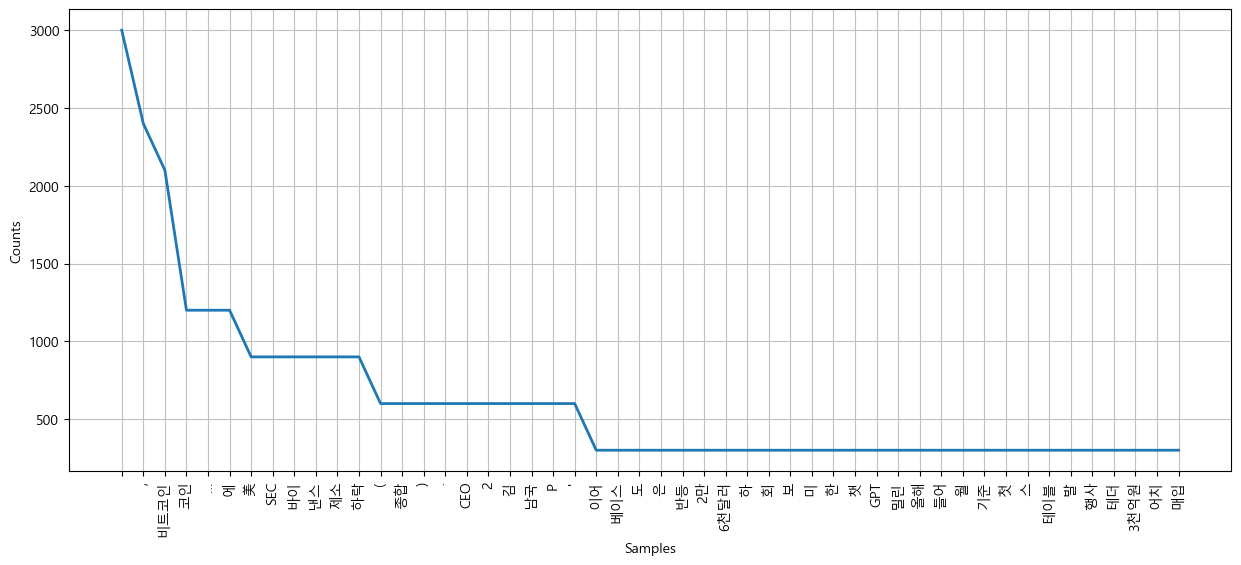

In [181]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
print(ko.vocab().most_common(200))

stop_words = [
    [('비트코인', 2700), ('\n', 2499), (',', 2032), ("'", 1970), ('..', 1393), ('기대', 856), ('美', 813), ('[', 760), (']', 760), ('·', 736), ('은', 727), ('대형주', 689), ('부채', 665), ('협상', 595), ('"', 593), ('상승', 592), ('선', 562), ('주목', 541), ('FOMC', 534), ('증시', 529), ('와', 525), ('전자', 519), ('…', 511), ('코인', 490), ('한도', 473), ('시', 417), ('황', 406), ('횡보', 378), ('가격', 373), ('은행', 365), ('장', 362), ('주', 361), ('중', 350), ('삼성', 350), ('주춤', 349), ('필요', 349), ("',", 346), ('순환', 346), ('순', 345), ('환매', 343), ('다우', 343), ('골디락스', 342), ('2만', 299), ('하락', 264), ('?', 213), ('디폴트', 211), ('의', 210), ('7000달러', 208), ('뉴욕증시', 206), ('금리', 205), ('달러', 199), ('속보', 197), ('3600만원', 197), ('회복', 194), ('인상', 194), ('강세', 192), ('BTC', 192), ('적', 192), ('것', 190), ('우려', 189), ('27', 188), ('성', 188), ('타결', 187), ('오늘', 187), ('금', 186), ('앞두고', 186), ('k', 183), ('예상', 181), ('(', 181), (')', 181), ('vs', 181), ('발표', 180), ('에', 178), ('엔비디아', 178), ('뚝', 178), ('알트', 177), ('지표', 177), ('바이든', 177), ('등락', 177), ('큰', 176), ('보합', 176), ('폭발', 176), ('안정', 176), ('고용', 175), ('약', 175), ('국채', 175), ('포함', 174), ('주말', 173), ('곧', 173), ('추천', 173), ('기자회견', 173), ('의미', 173), ('반영', 172), ('대형', 172), ('구리', 172), ('현재상황', 171), ('활짝', 171), ('됐는데', 171), ('POSCO', 171), ('홀딩스', 171), ('더할', 171), ('삼', 171), ('한국', 171), ('...', 92), ('이', 87), ('브리핑', 67), ('피자', 60), ('대', 57), ('더', 56), ('화폐', 55), ('가상', 53), ('리움', 51), ('미국', 50), ('‘', 49), ('데이', 48), ('’', 46), ('전망', 37), ('반등', 36), ('로', 36), ('도', 36), ('”', 36), ('리플', 34), ('거래', 34), ('“', 34), ('자산', 33), ('합의', 33), ('상향', 33), ('미', 32), ('원대', 32), ('테더', 32), ('↑', 31), ('시세', 31), ('이벤트', 31), ('빗썸', 31), ('급락', 27), ('크립', 26), ('암호', 26), ('스', 26), ('..."', 25), ('세', 25), ('기념', 24), ('시장', 24), ('급등', 23), ('한', 23), ('약세', 23), ('바이', 22), ('낸스', 22), ('흔들', 21), ('에도', 21), ('돌파', 21), ('투자자', 21), ('규제', 21), ('지속', 21), ('경제', 21), ('위기', 21), ('토', 20), ('6000달러', 20), ('투자', 19), ('단기', 19), ('으로', 18), ('채굴', 18), ('분석', 17), ('↓', 17), ('인', 17), ('코빗', 17), ('매입', 17), ('연구소', 17), ('속', 17), ('NFT', 16), ('가', 16), ('가능성', 16), ('연', 16), ('테이블', 16), ('K', 16), ('7천달러', 15), ('CPI', 15), ('붕괴', 15), ('첫', 15), ('최저', 15), ('3600만', 15), ('준', 15), ('승인', 15), ('올해', 14), ('-', 14), ('권', 14), ('조정', 14), ('중단', 14), ('해야', 14), ('3500만원', 13), ('랠리', 13), ('두', 13), ('하는', 13), ("'…", 13), ('상승세', 13), ('"…', 13), ('3%', 13), ('발', 13), ('행사', 13), ('까지', 13), ('올', 12)]
]

tokens_ko = [each_word for each_word in tokens_ko
            if each_word not in stop_words]

ko = nltk.Text(tokens_ko)

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

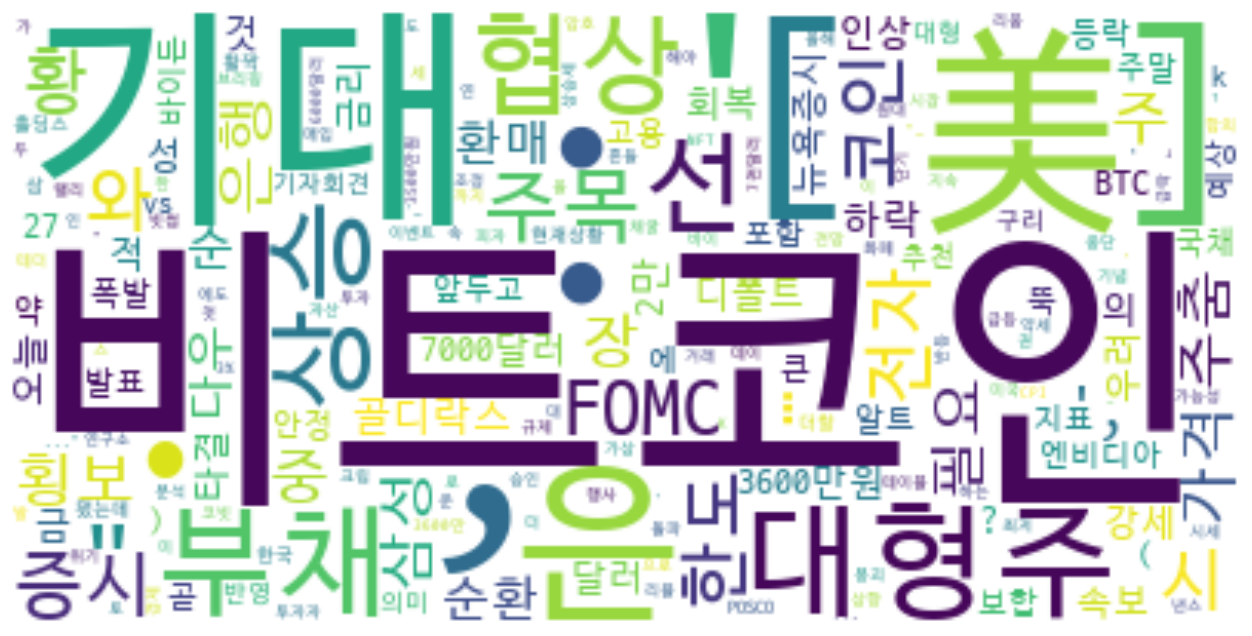

In [182]:
from wordcloud import WordCloud

data = [(text.replace('\n', ' '), freq) for text, freq in data]
# 데이터 전처리: 'data' 변수에 저장된 데이터가 여러 줄을 포함하고 있는 경우, 줄바꿈 문자 ('\n')을 공백 문자로 대체하여 데이터를 단일 줄로 변환

wordcloud = WordCloud(font_path=r"C:/Users/SW/Desktop/D2Coding-Ver1.3.2-20180524-all.ttc",
                      relative_scaling=0.2,
                      background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from konlpy.tag import Okt
import pandas as pd

#형태소 분석을 위한 함수
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

def data_preprocessing():
    #수집한 데이터 읽어오기
    bit_news = pd.read_csv('naver_bit_data.csv')
    #학습셋, 테스트셋 분리
    title_list = bit_news['news_title'].tolist()
    price_list = bit_news['stock_price_fluctuation'].tolist()
    #데이터의 80% 학습, 20%는 테스트
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=0)
    return title_train, title_test, price_train, price_test

def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tfidf, 로지스틱 회귀 이용
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)
    # 로지스틱
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0)     # C의 숫자가 너무 크면 과적합 (기본 1), penalty로 과적합 방지
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    # 학습
    pipe.fit(x_train, y_train)
    # 학습 정확도 측정
    y_pred = pipe.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    # 학습한 모델을 저장
    with open('pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)
    print('저장완료')     # 학습된 모델 저장 완료

def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('pipe.dat', 'rb') as fp:  # 읽기
        pipe = pickle.load(fp)
    while True:
        # 날짜 정보를 입력받아서 예측하기
        #date = input('날짜를 입력하세요 (YYYY-MM-DD): ')
        text = input('뉴스 타이틀을 입력해주세요 : ')
        str = [text]
        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str) * 100)  # 확률값을 구해서 *100
        # 예측 결과
        r2 = pipe.predict(str)[0]  # 상승('1'), 하락('0')
        if r2 == '1':
            print('비트코인 상승할 것으로 예상됩니다.')
        else:
            print('비트코인 하락할 것으로 예상됩니다.')
        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')
        
# 학습 함수
def model_learning():   # 감성분석 모델 생성
    title_train, title_test, price_train, price_test = data_preprocessing()
    learning(title_train, price_train, title_test, price_test)
    
# 사용 함수
def model_using():   # 감성분석 모델 사용
    using()

model_learning()
model_using()

C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.925
저장완료


뉴스 타이틀을 입력해주세요 :  미 SES


비트코인 하락할 것으로 예상됩니다.
정확도 : 90.087
------------------------------------------------


뉴스 타이틀을 입력해주세요 :  비트코인 오늘날자 하락인가?


비트코인 하락할 것으로 예상됩니다.
정확도 : 89.650
------------------------------------------------


뉴스 타이틀을 입력해주세요 :  비트코인 오늘날자 상승인가?


비트코인 하락할 것으로 예상됩니다.
정확도 : 90.064
------------------------------------------------


뉴스 타이틀을 입력해주세요 :  비트코인 오늘날자 급성장 상승인가?


비트코인 하락할 것으로 예상됩니다.
정확도 : 90.064
------------------------------------------------


KeyboardInterrupt: Interrupted by user

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from konlpy.tag import Okt
import pandas as pd

import xgboost as xgb

# 형태소 분석을 위한 함수
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

def data_preprocessing():
    # 데이터 불러오기
    bit_news = pd.read_csv('naver_bit_data.csv')
    title_list = bit_news['news_title'].tolist()
    price_list = bit_news['stock_price_fluctuation'].tolist()

    # 데이터의 80% 학습, 20%는 테스트
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=42)

    # TF-IDF 벡터화 객체 생성
    vectorizer = TfidfVectorizer(tokenizer=tokenizer)

    # 학습 데이터의 텍스트를 벡터로 변환 및 학습
    title_train_vectorized = vectorizer.fit_transform(title_train)

    # 테스트 데이터의 텍스트를 벡터로 변환
    title_test_vectorized = vectorizer.transform(title_test)

    # XGBoost 학습을 위해 DMatrix 형태로 변환
    train = xgb.DMatrix(title_train_vectorized, label=price_train)
    valid = xgb.DMatrix(title_test_vectorized, label=price_test)

    return train, valid, vectorizer

def model_learning():
    train, valid, vectorizer = data_preprocessing()
    
    # XGBoost 모델 학습
    params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
    model = xgb.train(params, train, num_boost_round=100, evals=[(valid, 'Validation')], early_stopping_rounds=10)
    
    # 학습된 모델과 벡터화 객체를 파일로 저장
    with open('model.dat', 'wb') as fp:
        pickle.dump((model, vectorizer), fp)

def model_using():
    # 저장된 모델과 벡터화 객체 불러오기
    with open('model.dat', 'rb') as fp:
        model, vectorizer = pickle.load(fp)
    
    while True:
        # 날짜 정보를 입력받아서 예측하기
        text = input('뉴스 타이틀을 입력해주세요: ')
        str = [text]
        
        # 입력 데이터를 TF-IDF 벡터로 변환
        str_vectorized = vectorizer.transform(str)
        
        # 입력 데이터를 DMatrix로 변환
        str_dmatrix = xgb.DMatrix(str_vectorized)
        
        # 예측 정확도
        r1 = np.max(model.predict(str_dmatrix) * 100)  # 확률값을 구해서 *100
        # 예측 결과
        r2 = model.predict(str_dmatrix)[0]  # 상승('1'), 하락('0')
        if r2 == 1:
            print('비트코인 상승할 것으로 예상됩니다.')
        else:
            print('비트코인 하락할 것으로 예상됩니다.')
        print('정확도: %.3f' % r1)
        print('------------------------------------------------')

model_learning()
model_using()



C:\Users\SW\Desktop\time-series-da-main\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[0]	Validation-logloss:0.52042
[1]	Validation-logloss:0.42745
[2]	Validation-logloss:0.37285
[3]	Validation-logloss:0.33976
[4]	Validation-logloss:0.31953
[5]	Validation-logloss:0.30742
[6]	Validation-logloss:0.30023
[7]	Validation-logloss:0.29592
[8]	Validation-logloss:0.29337
[9]	Validation-logloss:0.29189
[10]	Validation-logloss:0.29107
[11]	Validation-logloss:0.29060
[12]	Validation-logloss:0.29032
[13]	Validation-logloss:0.29014
[14]	Validation-logloss:0.29003
[15]	Validation-logloss:0.28997
[16]	Validation-logloss:0.28993
[17]	Validation-logloss:0.28991
[18]	Validation-logloss:0.28989
[19]	Validation-logloss:0.28989
[20]	Validation-logloss:0.28988
[21]	Validation-logloss:0.28988
[22]	Validation-logloss:0.28987
[23]	Validation-logloss:0.28987
[24]	Validation-logloss:0.28987
[25]	Validation-logloss:0.28987
[26]	Validation-logloss:0.28987
[27]	Validation-logloss:0.28987
[28]	Validation-logloss:0.28987
[29]	Validation-logloss:0.28987
[30]	Validation-logloss:0.28987
[31]	Validation-lo

뉴스 타이틀을 입력해주세요:  비트코인 하락


비트코인 하락할 것으로 예상됩니다.
정확도: 10.000
------------------------------------------------


뉴스 타이틀을 입력해주세요:  하락한 비트코인


비트코인 하락할 것으로 예상됩니다.
정확도: 10.000
------------------------------------------------


뉴스 타이틀을 입력해주세요:  김난국


비트코인 하락할 것으로 예상됩니다.
정확도: 9.223
------------------------------------------------


뉴스 타이틀을 입력해주세요:  김남국 해외


비트코인 하락할 것으로 예상됩니다.
정확도: 9.223
------------------------------------------------


뉴스 타이틀을 입력해주세요:  김남국 해외에도 코인 보유?...올해 들어 월 기준 첫 하락


비트코인 하락할 것으로 예상됩니다.
정확도: 10.460
------------------------------------------------


In [192]:
pip install scikit-learn konlpy pandas xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [142]:
from datetime import datetime

def check_price_movement(date, title):
    with open('pipe.dat', 'rb') as fp:  # 읽기
        pipe = pickle.load(fp)

    str = [title]
    # 예측 정확도
    r1 = np.max(pipe.predict_proba(str) * 100)  # 확률값을 구해서 *100
    # 예측 결과
    r2 = pipe.predict(str)[0]  # 상승('1'), 하락('0')
    
    formatted_date = datetime.strptime(date, '%Y-%m-%d').strftime('%Y년 %m월 %d일')
    
    print(f"{formatted_date} 비트코인 가격 변동 예측 결과:")
    if r2 == '1':
        print('비트코인 상승할 것으로 예상됩니다.')
    else:
        print('비트코인 하락할 것으로 예상됩니다.')
    print(f'정확도: {r1:.3f}')
    print('------------------------------------------------')

# 날짜별로 뉴스 제목에 대한 예측 결과 확인
def check_news_titles():
    news_data = pd.read_csv('naver_bit_data.csv')
    news_data['date'] = pd.to_datetime(news_data['date'])  # 날짜 형식으로 변환

    unique_dates = news_data['date'].unique()

    for date in unique_dates:
        date_str = date.strftime('%Y-%m-%d')
        news_titles = news_data[news_data['date'] == date]['news_title'].tolist()
        
        print(f"\n{date_str} 뉴스 제목 예측 결과:")
        for title in news_titles:
            check_price_movement(date_str, title)

# 날짜별로 뉴스 제목 예측 결과 확인
check_news_titles()


KeyError: 'date'